In [650]:
#Importing libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [651]:
train = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Datasets\Train (4).csv')
train.head()

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression


In [652]:
test = pd.read_csv(r'C:\Users\Gideon Kipkorir\Desktop\colab\Datasets\Test (3).csv')

In [653]:
print('train shape:',train.shape)
print('test sahpe:', test.shape)

train shape: (616, 3)
test sahpe: (309, 2)


In [654]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      616 non-null    object
 1   text    616 non-null    object
 2   label   616 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


In [655]:
train.isnull().sum()

ID       0
text     0
label    0
dtype: int64

In [656]:
train.duplicated().any()

False

In [657]:
#CLEANING texts to get rid of punctuation
# train.text = train.text.str.replace('[^a-zA-Z0-9]', ' ')
# train.text = train['text'].map(lambda x: x.lower())

In [658]:
train.sample(8)

,ID,text,label
6,9736J4UE,Why is everything so hard to deal with in this...,Depression
252,AAKPNVQO,I am broke and very unpreparedness in exams,Depression
358,NM3JOH4T,"I feel so low sickly,I was lonelyCurrently fee...",Depression
246,NOXKH5TS,Whom will I approach when mentally disturbed?,Depression
302,KWNGKGHQ,I feel like life does not make sense,Depression
298,1IHTBDJ2,What can I do to be relieved?,Depression
603,S6WK4NBL,"I feel confused, how can I overcome the problem?",Depression
583,4EHEFJ7J,How can I forgive myself from the past?,Depression


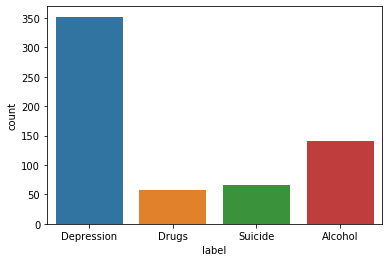

In [659]:
sns.countplot(x= train.label, data = train  )

In [660]:
df_drugs = train[train.label=='Drugs']
df_depression = train[train.label == 'Depression']
df_suicide = train[train.label =='Suicide']
df_alcohol = train[train.label == 'Alcohol']
print('depression cases are {}'.format(len(df_depression)))
print('Drug cases are {}'.format(len(df_drugs)))
print('sucide cases are {}'.format(len(df_suicide)))
print('Alchohol cases are {}'.format(len(df_alcohol)))

depression cases are 352
Drug cases are 58
sucide cases are 66
Alchohol cases are 140


In [661]:
# train.label = train.label.replace({'Drugs':1, 'Depression':2, 'Suicide':3, 'Alcohol':4})

In [662]:
#the dataset is so imbalance am going to try and sample them equally
depression_sample = df_depression.sample(80) #sampling 80 texts
alcohol_sample = df_alcohol.sample(80)

In [663]:
balance_df = pd.concat([depression_sample, alcohol_sample, df_suicide, df_drugs], axis = 0)
balance_df = balance_df.sample(frac=1).reset_index(drop=True)#shaffling the data
balance_df.label = balance_df.label.replace({'Drugs':1, 'Depression':2, 'Suicide':3, 'Alcohol':4})

In [664]:
balance_df.head()

,ID,text,label
0,2QRTGS6A,Why I needed to keep holding on to nothing. If...,3
1,1M6N5OI2,How to stop the addiction?,4
2,4AEMAVSI,Why is alcohol sold along the school perimeter,4
3,S6Z4BOS6,My hustle is not picking up,2
4,5JLVKXY3,I am involved in a Love affair and I would lik...,2


In [665]:
balance_df.shape

(284, 3)

In [666]:
balance_df = balance_df.drop(['ID'],1)
test_texts = test.drop(['ID'],1)

In [667]:
test_texts = test_texts['text']

In [668]:
train_texts = balance_df.text
train_labels = LabelEncoder().fit_transform(balance_df.label)
comb = pd.concat([train_texts, test_texts],axis =0)

In [669]:
print(train_texts.shape)
print(test_texts.shape)

(284,)
(309,)


In [670]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

min_df: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.
max_df: remove the words from the vocabulary which have occurred in more than _‘maxdf’ * total number of files in corpus.
sublinear_tf: set to True to scale the term frequency in logarithmic scale.
stop_words: remove the predefined stop words in 'english'.
use_idf: weight factor must use inverse document frequency.
ngram_range: (1, 2) to indicate that unigrams and bigrams will be considered.

In [671]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
features = tfidf.fit_transform(comb).toarray()
# test_texts = tfidf.fit_transform(test_texts)
# print("Each of the %d text is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

In [672]:
print(features.shape)
# print(test_texts.shape)

(593, 104)


In [673]:
# comb = pd.concat([features, test_texts],0)

In [674]:
# TOP_K = 20000
# # selector = SelectKBest(f_classif, k=min(TOP_K, train_texts[]))
# # selector.fit(train_texts, train_labels)

In [675]:
x_train, x_test, y_train, y_test = train_test_split(features[0:284], train_labels, test_size = 0.2, random_state = 20)

In [676]:
from sklearn import ensemble

In [677]:
xgb = ensemble.GradientBoostingClassifier(n_estimators= 300, max_depth=3, learning_rate= 0.1)
xgb = xgb.fit(x_train, y_train)

In [678]:
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test, y_pred, average='micro'))

[[14  1  3  0]
 [ 0  9  6  0]
 [ 0  1  8  0]
 [ 0  1  2 12]]
0.7543859649122807
0.7543859649122807


In [679]:
score = cross_val_score(xgb,features[0:284], train_labels, cv = 10,scoring = 'accuracy')


In [680]:
score.mean()

0.771551724137931

In [741]:
train.label.unique()

array(['Depression', 'Drugs', 'Suicide', 'Alcohol'], dtype=object)

In [770]:
pred = xgb.predict(features[285:])
Drugs = []
Depression =[]
Suicide=[]
Alcohol = []
for value in pred:
    if value ==1:
        Drugs.append(1)
    elif value < 0:
        Drugs.append(0)
#     elif value ==2:
#         Depression.append(1)
#     elif value ==3:
#         Suicide.append(1)
#     elif value ==0:
#         Alcohol.append(1)
#     else:
#         Drugs.append(0)
#         Alcohol.append(0)
#         Suicide.append(0)
#         Depression.append(0)
        

In [771]:
len(Drugs)
# # max(Depression)
# len(Suicide)
# len(Alcohol)
# # len(pred)

105

In [780]:
submit = pd.DataFrame( pred, columns=['labels'])
# submit['Drugs'] = Drugs
# submit['Suicide'] = Suicide
submit['ID'] = test.ID
submit = submit[['ID','labels']] 
submit.labels= submit.labels.replace({1:'Drugs', 2:'Depression',3:'Suicide', 0:'Alcohol'})
submit.head()

,ID,labels
0,02V56KMO,Drugs
1,03BMGTOK,Drugs
2,03LZVFM6,Drugs
3,0EPULUM5,Alcohol
4,0GM4C5GD,Depression


In [786]:
sub = pd.DataFrame(pd.get_dummies(submit.labels))
sub['ID'] = test.ID
sub = sub[['ID','Depression','Alcohol', 'Suicide','Drugs']]
sub.head()
sub.to_csv(C:\Users\Gideon Kipkorir\Desktop\colab\Datasets\'submission.csv')

SyntaxError: invalid syntax (<ipython-input-786-6bec6562e666>, line 5)

In [782]:
#[['Depression','Alcohol', 'Drugs', 'Suicide']]

In [690]:
submit.Label.unique()

array([0, 1], dtype=uint8)

In [218]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Limit on the number of features. We use the top 20K features.
TOP_K = 20000

# Whether text should be split into word or character n-grams.
# One of 'word', 'char'.
TOKEN_MODE = 'word'

# Minimum document/corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 2

def ngram_vectorize(train_texts, train_labels, test_texts):
    """Vectorizes texts as n-gram vectors.

    1 text = 1 tf-idf vector the length of vocabulary of unigrams + bigrams.

    # Arguments
        train_texts: list, training text strings.
        train_labels: np.ndarray, training labels.
        val_texts: list, validation text strings.

    # Returns
        x_train, x_val: vectorized training and validation texts
    """
    # Create keyword arguments to pass to the 'tf-idf' vectorizer.
    kwargs = {
            'ngram_range': NGRAM_RANGE,  # Use 1-grams + 2-grams.
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,  # Split text into word tokens.
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
    vectorizer = TfidfVectorizer(**kwargs)

    # Learn vocabulary from training texts and vectorize training texts.
    x_train = vectorizer.fit_transform(train_texts)

    # Vectorize validation texts.
    x_val = vectorizer.transform(test_texts.text)

    # Select top 'k' of the vectorized features.
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(test_texts.text).astype('float32')
    return x_train, x_val

In [219]:
selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
selector.fit(x_train, train_labels)
x_train = selector.transform(x_train).astype('float32')

ValueError: Found input variables with inconsistent numbers of samples: [227, 284]

In [136]:
tfidf.fit_transform(test_texts)

ValueError: max_df corresponds to < documents than min_df

In [260]:
xgb = xgb.fit(x_train, train_labels )

In [261]:
y_pred = xgb.predict(vectorizer.transform(test_texts))

In [258]:
y_pred

array([1.30110851])